# 🌍 **FLUXCOM xBase Dataset**
> **Author**: *Tahmidul Azom Sany*  
> **Affiliation**: PhD Student, Climate Dynamics, George Mason University  
> **Contact**: [tsany@gmu.edu](mailto:tsany@gmu.edu)  

---

### 📊 Dataset Details
- **Source**: FLUXCOM xBase Data
- **Spatial Resolution**: 0.05° x 0.05°
- **Temporal Resolution**: Daily data (12UTC) from `2001-01-01` to `2003-12-30` (Reduced Dataset)
- **Variable**: ET_Daily *(mm/day)* "Evapotranspiration is the sum of water evaporated from the land surface and transpired from plants. It provides a measurement of vegetation water use."

---

### 💾 Zarr Format
"*Zarr is a format tailored for **chunked**, **compressed**, and **N-dimensional arrays**. It serves both as a storage and computational format to efficiently manage large datasets.*" More details can be found in the [official documentation](https://zarr.readthedocs.io/en/stable/).

---

### 📂 Zarr Data Structure
Zarr employs a hierarchical storage model, similar to directories and files in a traditional file system:
- **Group**: The top-level container that can include other `groups` or `arrays`.
- **Array**: A N-dimensional chunked array within a `group`.
- **Metadata**: Stored in a human-readable JSON format.
- **Data Chunks**: Often compressed and stored as binary blobs.

---


In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import dask

import xarray as xr
import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
import cartopy.feature as feature
from cartopy.util import add_cyclic_point

In [2]:
# Define the path to your zarr dataset
zarr_path = '/home/tsany/clim680_dataset/xBase_sliced_2004'

# Open the dataset using xarray
ds = xr.open_zarr(zarr_path) 
ds

<xarray.Dataset>
Dimensions:   (time: 1093, lat: 3600, lon: 7200)
Coordinates:
  * lat       (lat) float64 89.97 89.92 89.88 89.83 ... -89.88 -89.92 -89.97
  * lon       (lon) float64 -180.0 -179.9 -179.9 -179.8 ... 179.9 179.9 180.0
  * time      (time) datetime64[ns] 2001-01-01T12:00:00 ... 2003-12-30T12:00:00
Data variables:
    ET_daily  (time, lat, lon) float32 dask.array<chunksize=(1093, 40, 40), meta=np.ndarray>

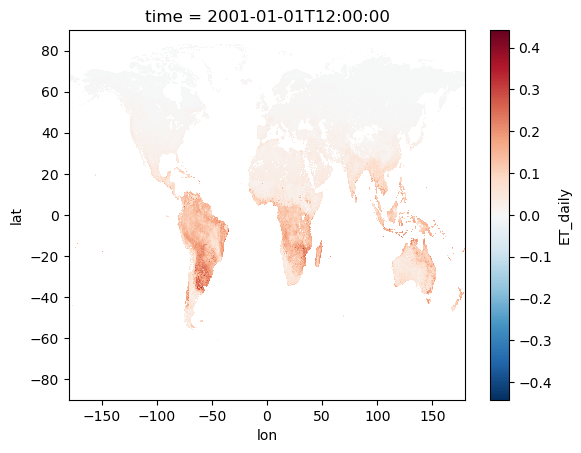

In [3]:
ds.ET_daily[0,:,:].plot()

In [4]:
ds_mean = ds.mean(dim='time')
ds_mean

<xarray.Dataset>
Dimensions:   (lat: 3600, lon: 7200)
Coordinates:
  * lat       (lat) float64 89.97 89.92 89.88 89.83 ... -89.88 -89.92 -89.97
  * lon       (lon) float64 -180.0 -179.9 -179.9 -179.8 ... 179.9 179.9 180.0
Data variables:
    ET_daily  (lat, lon) float32 dask.array<chunksize=(40, 40), meta=np.ndarray>

/home/tsany/.conda/envs/clim_data/lib/python3.10/site-packages/xarray/core/indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(
/home/tsany/.conda/envs/clim_data/lib/python3.10/site-packages/xarray/core/indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(


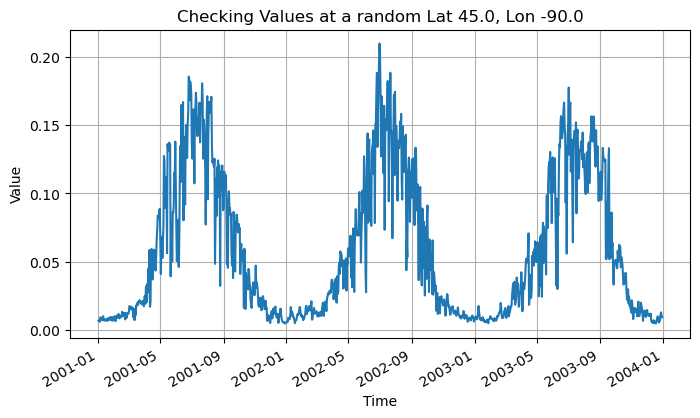

In [5]:
# random location
latitude = 45.0
longitude = -90.0  

# Extract time series 
time_series = ds['ET_daily'].sel(lat=latitude, lon=longitude, method='nearest')

# Plot the time series
plt.figure(figsize=(8, 4))  # Adjust the figure size as needed
time_series.plot.line(x='time')
plt.title(f'Checking Values at a random Lat {latitude}, Lon {longitude}')
plt.xlabel('Time')
plt.ylabel('Value')
# plt.xticks(np.arange(2001, 2015))
plt.grid(True)
plt.show()

CPU times: user 2min 41s, sys: 10.6 s, total: 2min 52s
Wall time: 51.6 s


Text(0.5, 1.0, 'FLUXCOM xBase Daily Evapotranspiration (ET_daily)')

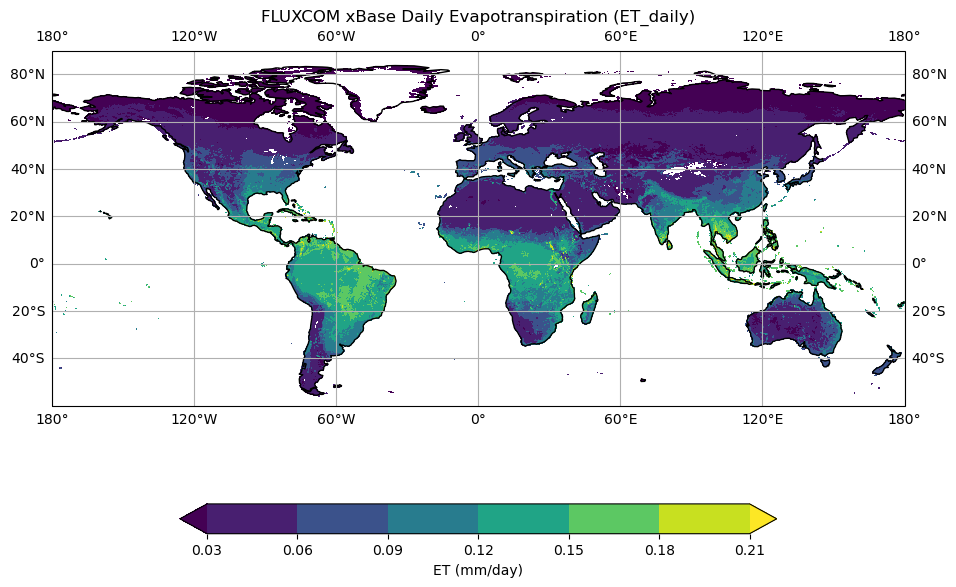

In [6]:
%%time

# Make the figure larger
fig = plt.figure(figsize=(11,8.5))

# Set the axes using the specified map projection
ax=plt.axes(projection=ccrs.PlateCarree())

# Add cyclic point to data
data=ds_mean['ET_daily']
data, lons = add_cyclic_point(data, coord=ds['lon'])

cs=ax.contourf(lons, ds['lat'], data, transform = ccrs.PlateCarree(),cmap='viridis',extend='both')
ax.coastlines()
ax.set_extent([-180, 180, -60, 90], crs=ccrs.PlateCarree())
ax.gridlines(draw_labels=True)

cbar = plt.colorbar(cs,shrink=0.7,orientation='horizontal',label='ET (mm/day)')
plt.title('FLUXCOM xBase Daily Evapotranspiration (ET_daily)')

CPU times: user 2min 34s, sys: 11 s, total: 2min 45s
Wall time: 37.1 s


Text(0.5, 1.0, 'FLUXCOM xBase Daily Evapotranspiration (ET_daily)')

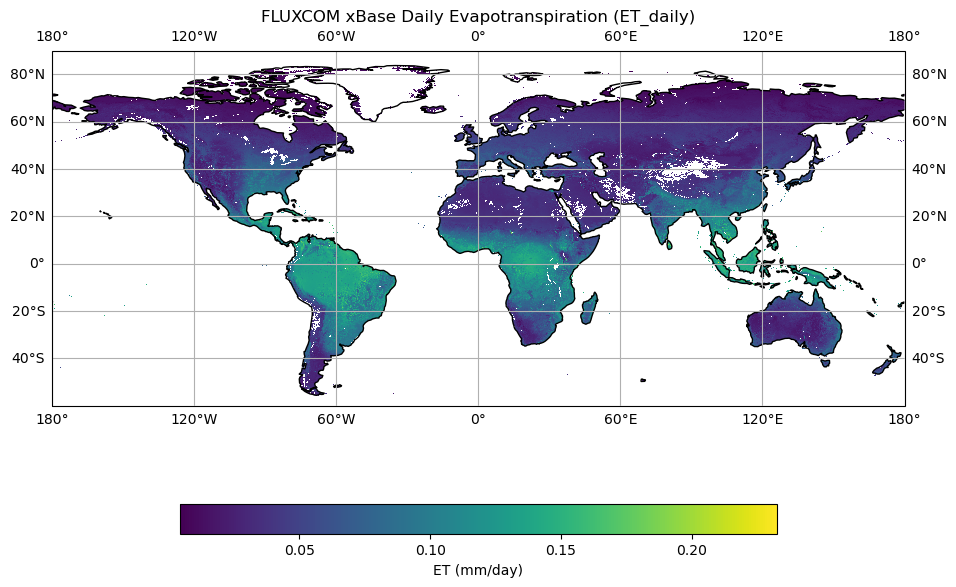

In [7]:
%%time
# Make the figure larger
fig = plt.figure(figsize=(11,8.5))

# Set the axes using the specified map projection
ax = plt.axes(projection=ccrs.PlateCarree())

# Add cyclic point to data
data=ds_mean['ET_daily']
data, lons = add_cyclic_point(data, coord=ds['lon'])

# Using pcolormesh instead of contourf
cs = ax.pcolormesh(lons, ds['lat'], data, transform=ccrs.PlateCarree(), cmap='viridis')

ax.coastlines()
ax.gridlines(draw_labels=True)
ax.set_extent([-180, 180, -60, 90], crs=ccrs.PlateCarree())
cbar = plt.colorbar(cs, shrink=0.7, orientation='horizontal', label='ET (mm/day)')
plt.title('FLUXCOM xBase Daily Evapotranspiration (ET_daily)')

In [8]:
ds

<xarray.Dataset>
Dimensions:   (time: 1093, lat: 3600, lon: 7200)
Coordinates:
  * lat       (lat) float64 89.97 89.92 89.88 89.83 ... -89.88 -89.92 -89.97
  * lon       (lon) float64 -180.0 -179.9 -179.9 -179.8 ... 179.9 179.9 180.0
  * time      (time) datetime64[ns] 2001-01-01T12:00:00 ... 2003-12-30T12:00:00
Data variables:
    ET_daily  (time, lat, lon) float32 dask.array<chunksize=(1093, 40, 40), meta=np.ndarray>

In [9]:
ds_seas = ds.groupby('time.season').mean()
ds_seas

<xarray.Dataset>
Dimensions:   (season: 4, lat: 3600, lon: 7200)
Coordinates:
  * lat       (lat) float64 89.97 89.92 89.88 89.83 ... -89.88 -89.92 -89.97
  * lon       (lon) float64 -180.0 -179.9 -179.9 -179.8 ... 179.9 179.9 180.0
  * season    (season) object 'DJF' 'JJA' 'MAM' 'SON'
Data variables:
    ET_daily  (season, lat, lon) float32 dask.array<chunksize=(1, 40, 40), meta=np.ndarray>

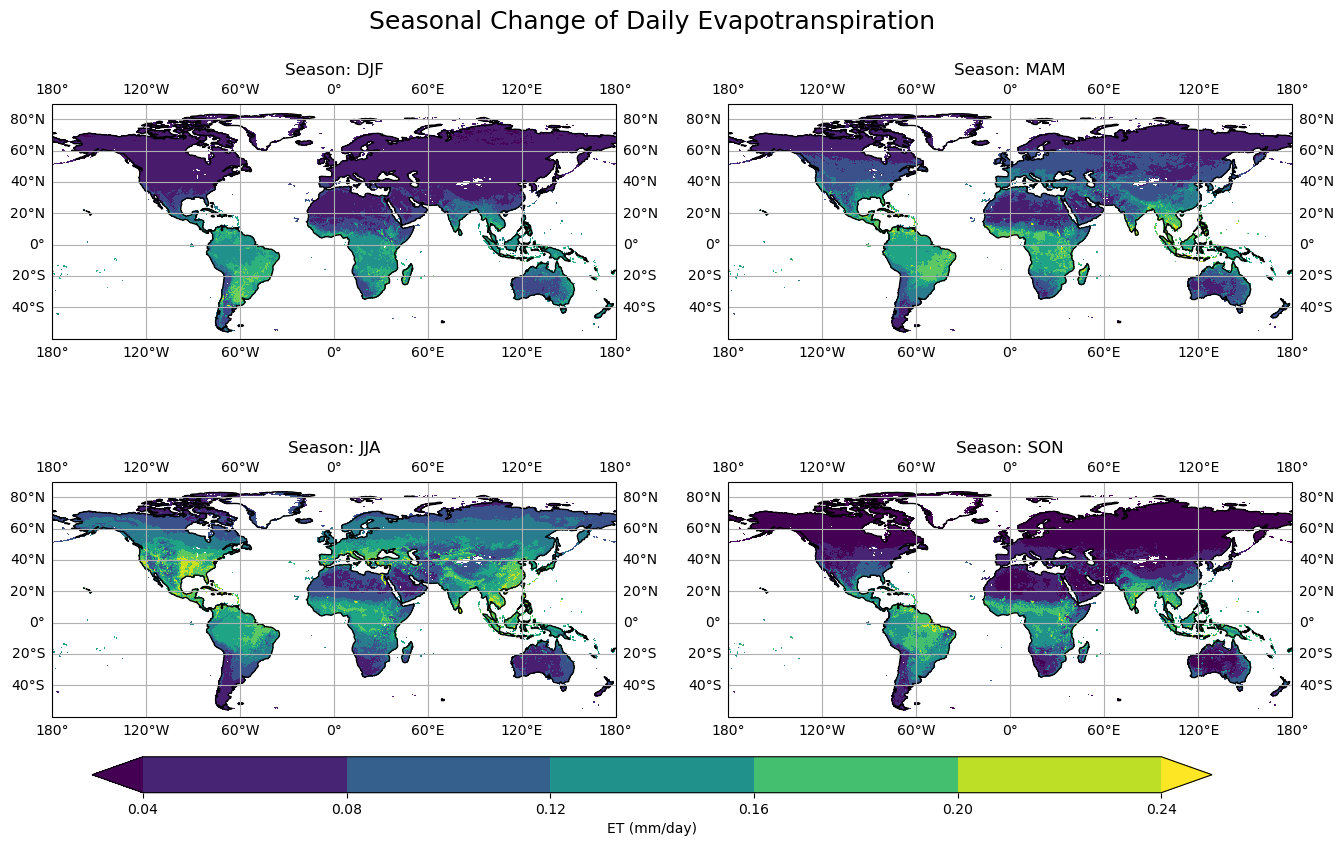

In [10]:
fig, axs = plt.subplots(2, 2, figsize=(16, 9), subplot_kw={'projection': ccrs.PlateCarree()})
fig.suptitle('Seasonal Change of Daily Evapotranspiration', fontsize=18, y=0.94)

seasons = ['DJF', 'MAM', 'JJA', 'SON']

for ax, season in zip(axs.flatten(), seasons):
    data = ds_seas['ET_daily'].sel(season=season)
    data, lons = add_cyclic_point(data, coord=ds['lon'])
    # Plot the data
    cs = ax.contourf(lons, ds['lat'], data, transform=ccrs.PlateCarree(), cmap='viridis', extend='both')
    ax.coastlines()
    ax.set_extent([-180, 180, -60, 90], crs=ccrs.PlateCarree())
    ax.gridlines(draw_labels=True)
    ax.set_title(f'Season: {season}')

# Add a colorbar
cbar_ax = fig.add_axes([0.15, 0.07, 0.7, 0.04]) # position of colorbar
cbar = plt.colorbar(cs, cax=cbar_ax, orientation='horizontal', label='ET (mm/day)')

plt.show()